In [2]:
from preprocessing import (
    preprocess_kjv,
    get_word_types_with_tf_idf,
    get_gospel_top_70_words_dictionary,
)
from extract_relations import (
    get_directed_relations,
    order_directed_relations,
)
from ontology_algorithm import (
    construct_ontology_hierarchy,
    print_hierarchy_tree_from_ontology,
    draw_hierarchy_tree_from_ontology,
)
from topic_modeling import (
    kmeans_tfidf_clustering,
    filter_topic_modeling_key_terms,
)
import re

## Preprocessing

We will preprocess words from the theology reconsidered text using tf-idf and extract the top n words.

In [3]:
theology_reconsidered_path = "/Users/zebo/Documents/Freelancing/upwork/Peter_J_Worth_Jr/NLP/hierarchical_clustering/data/theology_reconsidered.txt"

with open(theology_reconsidered_path, "r") as f:
    theology_reconsidered = f.read()

def split_into_chapters(input_filename, verbose=False):
    """Split the input file into chapters."""
    titles = []
    chapters = []
    # Open the input file and read its contents
    with open(input_filename, 'r', encoding='utf-8') as input_file:
        contents = input_file.read()

    # Split the contents into chunks based on the separator criteria
    chunks = contents.split('\n\n\n\n')             # empty lines in the text

    ch_cnt = 0

    # Create an output file for each chunk
    for i, chunk in enumerate(chunks):
        # Skip empty chunks
        if not chunk.strip():
            continue

        # Extract the title and content from the chunk
        lines = chunk.strip().split('\n')
        title = lines[0]
        content = '\n'.join(lines[1:])

        if verbose:
            print("processing CH" + str(ch_cnt) + ": " + title + "...")

        # Create the output file
        chapters.append(content)
        titles.append(title)

        ch_cnt += 1
    return titles, chapters

titles, chapters = split_into_chapters(theology_reconsidered_path)

chapters[0]

# Should I remove the word Figure?

# Remove \n from the chapters.
chapters = [chapter.replace("\n", "") for chapter in chapters]
# Remove \t from the chapters.
chapters = [chapter.replace("\t", " ") for chapter in chapters]


# import re

# Separate the chapters into sentences.
sentences_per_chapter_prep = [re.split("\.  ", chapter) for chapter in chapters]
sentences_per_chapter_prep = [[sentence + "." for sentence in chapter] for chapter in sentences_per_chapter_prep]

sentences_per_chapter = []
for chapter_prep in sentences_per_chapter_prep:
    chapter = []
    for sentence in chapter_prep:
        chapter.extend(re.split("(?<!i.e|etc|e.g|iii)\. ", sentence))
    sentences_per_chapter.append(chapter)

#sentences_per_chapter[0]
for title_index, title in enumerate(titles):
    print(title_index, title)

0 Introduction
1 Prologue: Mythos and Mysticism in Antiquity
2 A Brief History of the Mystical Arts: Beyond Yoga
3 Meditation as a Mystical Art: A Bridge Through Time 
4 Overarching Themes: The Laurasian Hypothesis and a New Metaphysics
5 Setting the Stage: A Brief of History of Modern Man
6 Part I: On Creation Mythos (Cosmogony)
7 From Language to Writing: The Dawn of History
8 The Ancient Hebrews: The Tanakh, Torah and Five Books of Moses
9 Ancient Egyptian Mythos: The Weighing of the Heart, Ra and Ma'at
10 The Enûma Eliš: Sumer- Babylonian Creation Mythos
11 Ancient Persian Theology: Zarathustra and the Avesta
12 Classic Hellenic Theogony: Chaos, Chronos and Eros
13 Orphic Theogony: Thanes and the Great Cosmic Egg
14 Vedic Cosmogony: Skepticism, Puruṣa and Hiraṇyagarbha 
15 Ancient Chinese Theology: Shàngdì, Pángǔ, Tiān and the Dao
16 Roman Cosmogony: The Metamorphoses of Ovid
17 Eurasian Mythos: Establishing the Laurasian Hypothesis 
18 Part II: On Ancient Philosophy (Logos)
19 Fro

In [4]:
# Remove chapters, titles and sentences if the title starts with "Part ".
title_indices_to_remove = [title_index for title_index, title in enumerate(titles) if title.startswith("Part ")]

titles = [title for title_index, title in enumerate(titles) if title_index not in title_indices_to_remove]
sentences_per_chapter = [chapter for chapter_index, chapter in enumerate(sentences_per_chapter) if chapter_index not in title_indices_to_remove]
chapters = [chapter for chapter_index, chapter in enumerate(chapters) if chapter_index not in title_indices_to_remove]

## Perform topic modeling

In [5]:
NUM_TOPICS = 8
clusters, key_terms_per_cluster = kmeans_tfidf_clustering(
    chapters=chapters,
    num_topics=NUM_TOPICS,
    n_key_terms=10,
)

CLUSTER #1
Cluster Chapters: [1, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 28, 30]
Key Features: ['ancient', 'tradition', 'creation', 'gods', 'mythos', 'also', 'well', 'one', 'greek', 'philosophical']
CLUSTER #2
Cluster Chapters: [43, 51]
Key Features: ['quality', 'pirsig', 'static', 'metaphysics', 'dynamic', 'experience', 'reality', 'subject object', 'metaphysics quality', 'static quality']
CLUSTER #3
Cluster Chapters: [20, 21, 23, 24, 27, 45]
Key Features: ['knowledge', 'plato', 'brahman', 'socrates', 'suffering', 'philosophical', 'soul', 'vedānta', 'one', 'philosophy']
CLUSTER #4
Cluster Chapters: [0, 2, 3, 4, 5, 22, 29, 31, 46, 47]
Key Features: ['philosophical', 'yoga', 'ramakrishna', 'ancient', 'well', 'theo', 'philosophy', 'work', 'theo philosophical', 'also']
CLUSTER #5
Cluster Chapters: [37, 38, 39, 40, 41, 48]
Key Features: ['quantum', 'mechanics', 'theory', 'reality', 'relativity', 'quantum theory', 'einstein', 'quantum mechanics', 'subatomic', 'physics']
CLUSTER #6
Cluster Chapte

## Run the workflow on one cluster

Chosen chapters  [14, 17, 18, 19, 25, 26, 44]
Removing the following terms:  ['one', 'ancient chinese']
Removing  heaven  from current_level_words, it will be a child of  dao

 Current level:  0
All children:  ['which', 'power', 'which', 'ancestors', 'that', 'order', 'this', 'history', 'one', 'establishment', 'civilization', 'bce', 'which', 'age', 'justice', 'overthrow', 'emperor', 'system', 'trigrams', 'what', 'place', 'foundations', 'state', 'lu', 'china', 'fact', 'class', 'priests', 'influence', 'many', 'one', 'things', 'things', 'myriad', 'recognition', 'reality', 'definition', 'clarity', 'sense', 'understanding', 'aspects', 'pattern', 'heaven', 'which', 'laws', 'process', 'systems', 'daoism', 'example']
Current level words  ['order', 'process', 'ancestors', 'history', 'establishment', 'civilization', 'system', 'trigrams', 'place', 'foundations', 'things', 'myriad', 'systems', 'daoism', 'example', 'things', 'recognition', 'reality', 'definition', 'clarity', 'sense', 'aspects', 'pat

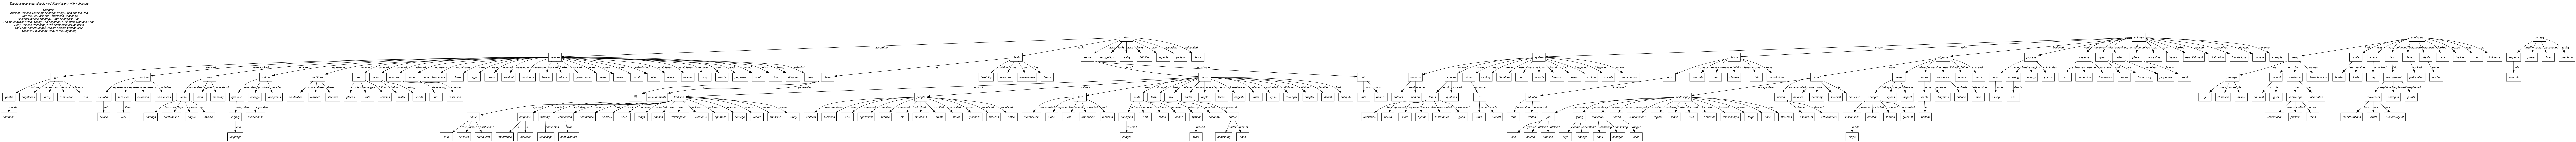

In [37]:
# Specify the chapters used in the analysis.
chosen_cluster = 7
use_key_terms = True
chosen_hierarchy_depth = 5
chosen_hierarchy_max_width = None

chosen_chapters = clusters[chosen_cluster]

chapter_titles = [titles[i] for i in chosen_chapters]
key_terms = key_terms_per_cluster[chosen_cluster]

print("Chosen chapters ", chosen_chapters)

text_per_chapter = []
for chapter_idx in chosen_chapters:
    text_per_chapter.append(chapters[chapter_idx])

tf_idf_pre_filtering = get_word_types_with_tf_idf(
    text_per_chapter,
    "tf",
    skip_stopwords=True,
    include_verbs=False,
    include_determiners=False,
    include_pronouns=False,
    include_adverbs=False,
    include_numbers=False,
)

if use_key_terms:
    current_level_words = filter_topic_modeling_key_terms(
        key_terms=key_terms_per_cluster[chosen_cluster],
        tf_idf_word_types=tf_idf_pre_filtering,
        verbose=True,
    )
else:
    #raise NotImplementedError("Not implemented yet.")
    # Specify the number of top words to use.
    n = max(50, len(chosen_chapters)*5)
    current_level_words = tf_idf_pre_filtering.head(n)["word"].values

# Create a list of all verses of the chosen books.
all_verses = []
for chapter_idx in chosen_chapters:
    all_verses.extend(sentences_per_chapter[chapter_idx])

used_words = set()
all_ordered_directed_relations = []
all_relations_to_verbs = {}



# First, let's see relations between the key terms.
directed_relations, relations_to_verbs = get_directed_relations(
    top_n_words=current_level_words,
    all_verses=all_verses,
    verbose=False,
)

# Order the directed relations.
ordered_directed_relations = order_directed_relations(
    directed_relations=directed_relations,
    tf_idf_pre_filtering=tf_idf_pre_filtering,
    order_by="product",
    include_ordering_wrt_occurences=True,
    verbose=False,
)

for relation in ordered_directed_relations:
    if relation[0] in current_level_words and relation[1] in current_level_words:
        current_level_words.remove(relation[1])
        print("Removing ", relation[1], " from current_level_words, it will be a child of ", relation[0])


for current_level in range(chosen_hierarchy_depth):
    print("\n Current level: ", current_level)

    if len(current_level_words) == 0:
        break

    # Now lets see all relations that come out of the key terms.
    directed_relations, relations_to_verbs = get_directed_relations(
        top_n_words=current_level_words,
        all_verses=all_verses,
        verbose=False,
        get_all_one_directional=True,
    )
    print("All children: ", [relation[1] for relation in directed_relations])
    
    # Filter out the relations whose children is not in tf_idf_pre_filtering
    # and it has not been used already.
    directed_relations = {
        key: child for key, child in directed_relations.items()
        if key[1] in tf_idf_pre_filtering["word"].values and
        key[1] not in used_words
    }

    # Order the directed relations.
    ordered_directed_relations = order_directed_relations(
        directed_relations=directed_relations,
        tf_idf_pre_filtering=tf_idf_pre_filtering,
        order_by="product",
        include_ordering_wrt_occurences=True,
        verbose=False,
    )   

    # Constrain at most chosen_hierarchy_max_width relations per key term.
    if chosen_hierarchy_max_width is not None:
        counter = {}
        relations_to_remove = []
        for idx, relation in enumerate(ordered_directed_relations):
            if relation[0] in counter:
                counter[relation[0]] += 1
            else:
                counter[relation[0]] = 1
            if counter[relation[0]] > 5:
                relations_to_remove.append(relation)
        for relation in relations_to_remove:
            ordered_directed_relations.remove(relation)

    # Add parents and children to the used words.
    used_words.update([relation[0] for relation in ordered_directed_relations])
    used_words.update([relation[1] for relation in ordered_directed_relations])

    # Add the relations to the list of all relations.
    all_ordered_directed_relations.extend(ordered_directed_relations)
    all_relations_to_verbs.update(relations_to_verbs)

    # Set the current level words to the words that are the children of the current level words.
    current_level_words = [relation[1] for relation in ordered_directed_relations]
    print("Current level words ", current_level_words)


# Construct the ontology hierarchy.
ontology_hierarchy, words_with_parents = construct_ontology_hierarchy(
    ordered_directed_relations=all_ordered_directed_relations,
)
print(all_relations_to_verbs)
# Draw the ontology hierarchy.
draw_hierarchy_tree_from_ontology(
    ontological_hierarchy=ontology_hierarchy,
    relations_to_verbs=all_relations_to_verbs,
    title="Theology reconsidered topic modeling cluster " + str(chosen_cluster) + " with " + str(len(chosen_chapters)) + " chapters",
    topic_modelling_chapters=chapter_titles,
)

In [24]:
import spacy

nlp = spacy.load("en_core_web_lg")
doc_1 = nlp(all_verses[615])
spacy.displacy.render(doc_1, style="dep", jupyter=True)

## Run for all clusters of the text

Removing the following terms:  ['also', 'well', 'one', 'first', 'writing', 'written', 'see', 'much', 'sumer', 'even', 'perhaps', 'sumer babylonian', 'find']


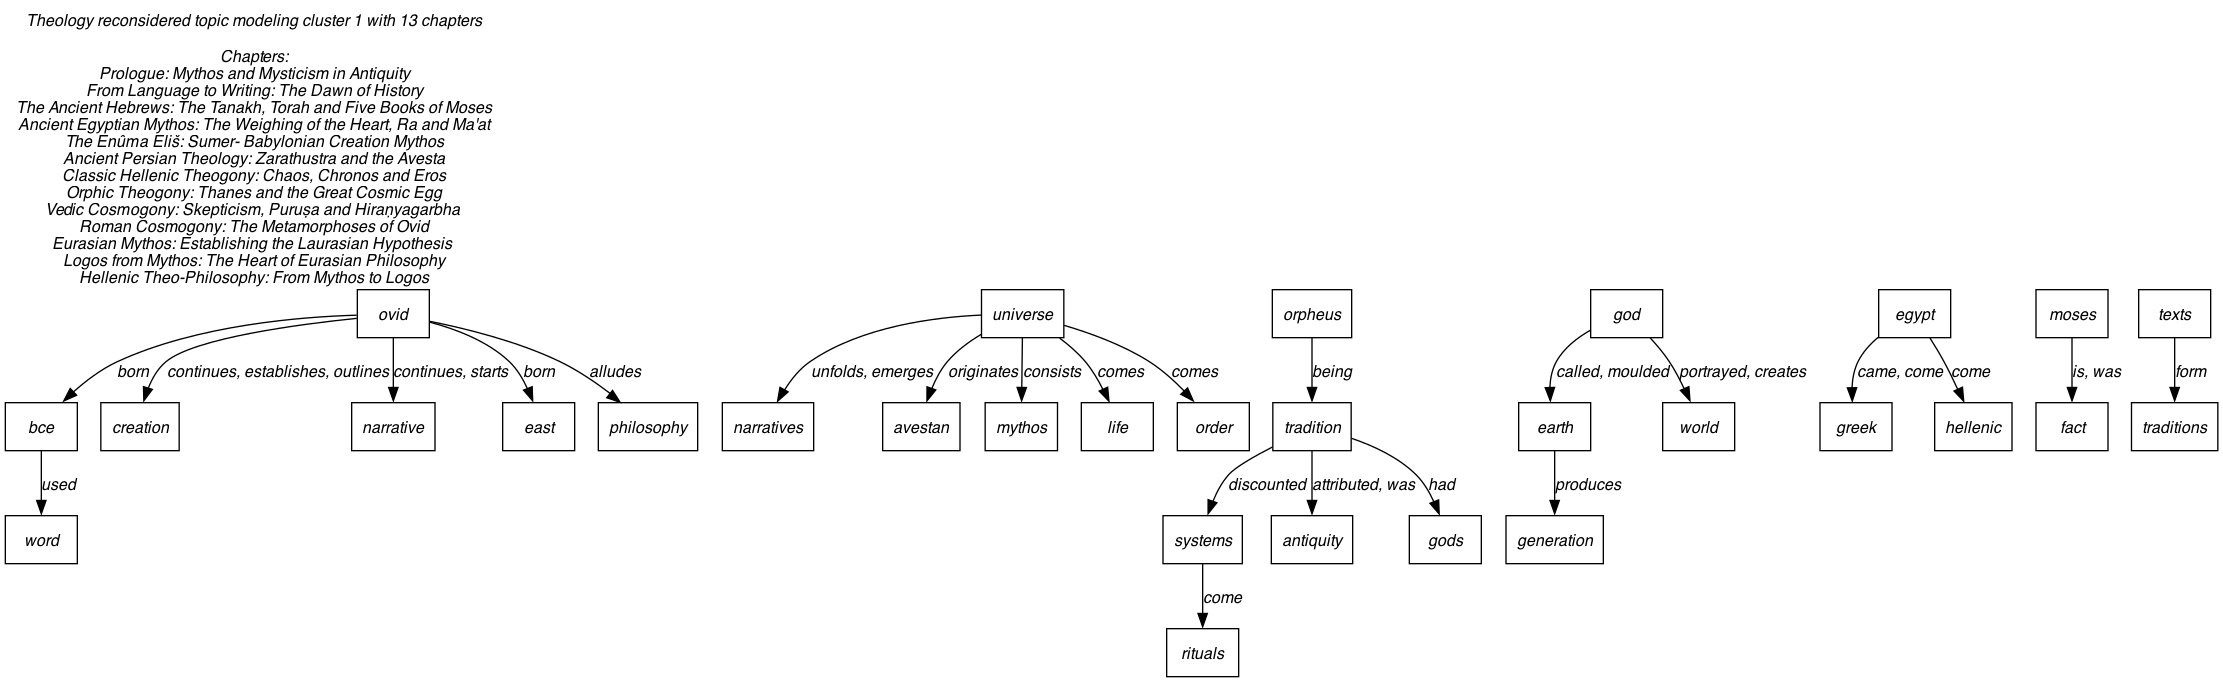

Removing the following terms:  ['subject object', 'metaphysics quality', 'static quality', 'object metaphysics', 'dynamic quality', 'one', 'even', 'subjectobject', 'motorcycle maintenance', 'subjects objects', 'aspect quality', 'subjectobject metaphysics', 'zen art', 'art motorcycle']


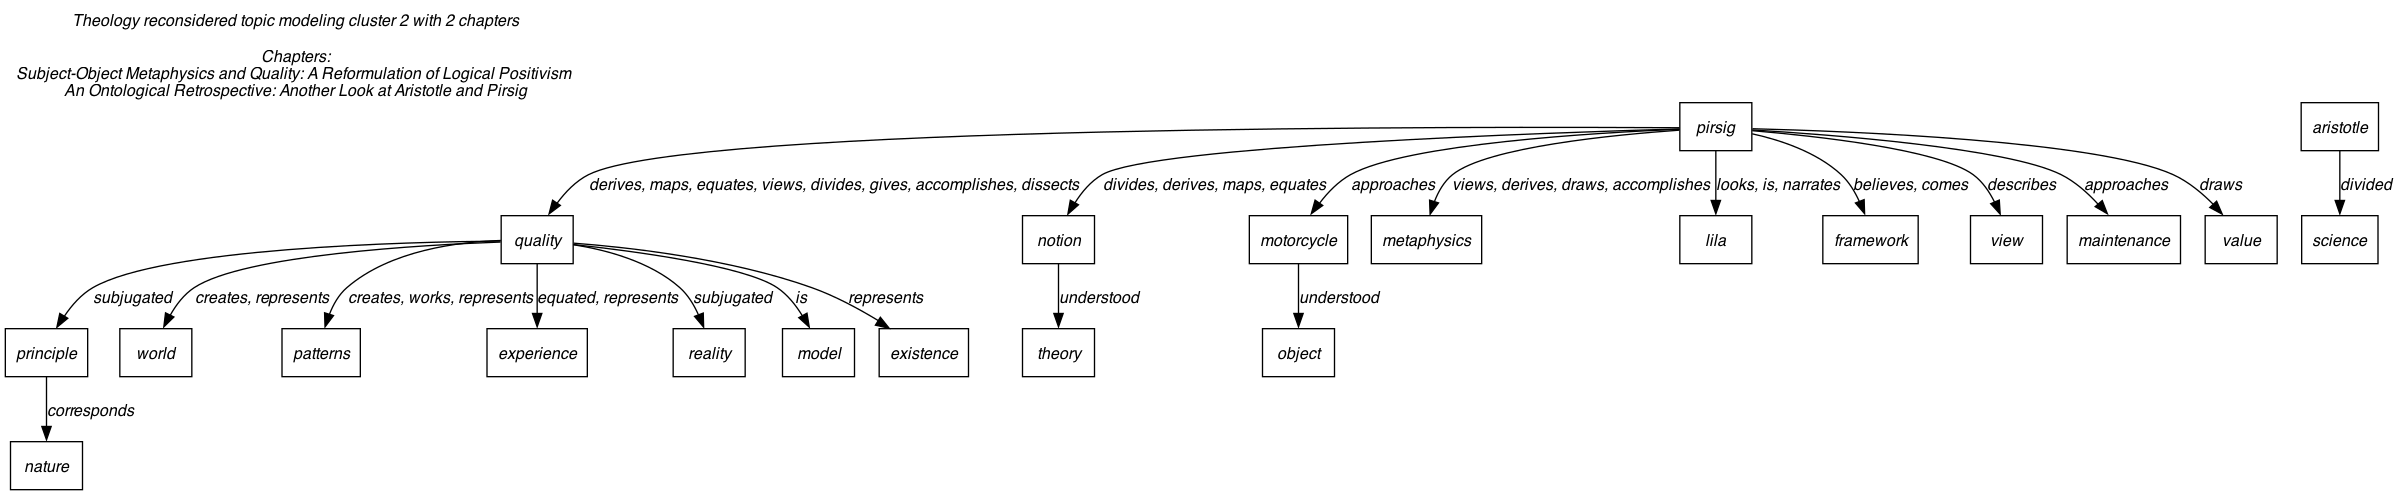

Removing the following terms:  ['suffering', 'one', 'also', 'well', 'first', 'works', 'form knowledge', 'said', 'know', 'two']


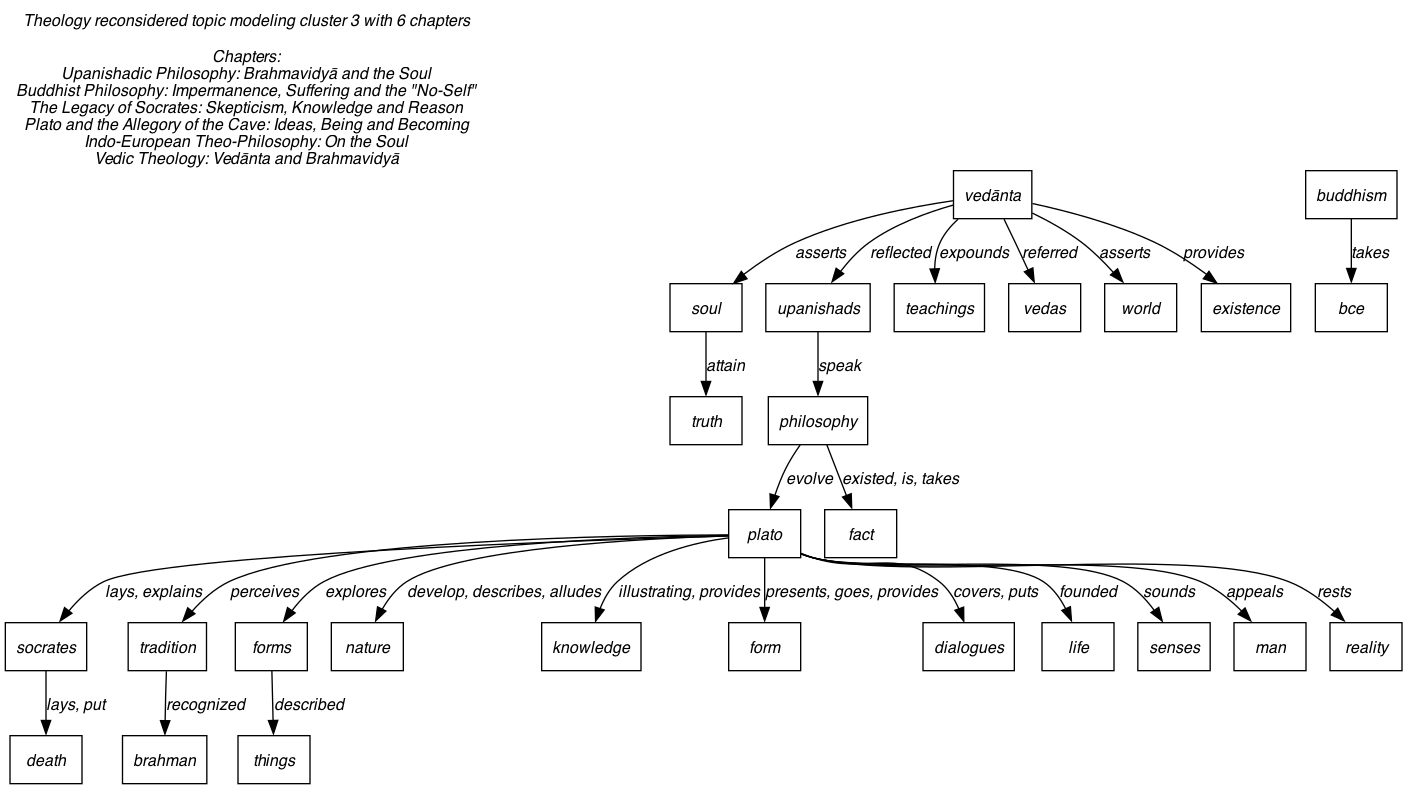

Removing the following terms:  ['well', 'theo', 'theo philosophical', 'also', 'one', 'find', 'even', 'first', 'much', 'theophilosophical', 'indo', 'throughout eurasia']


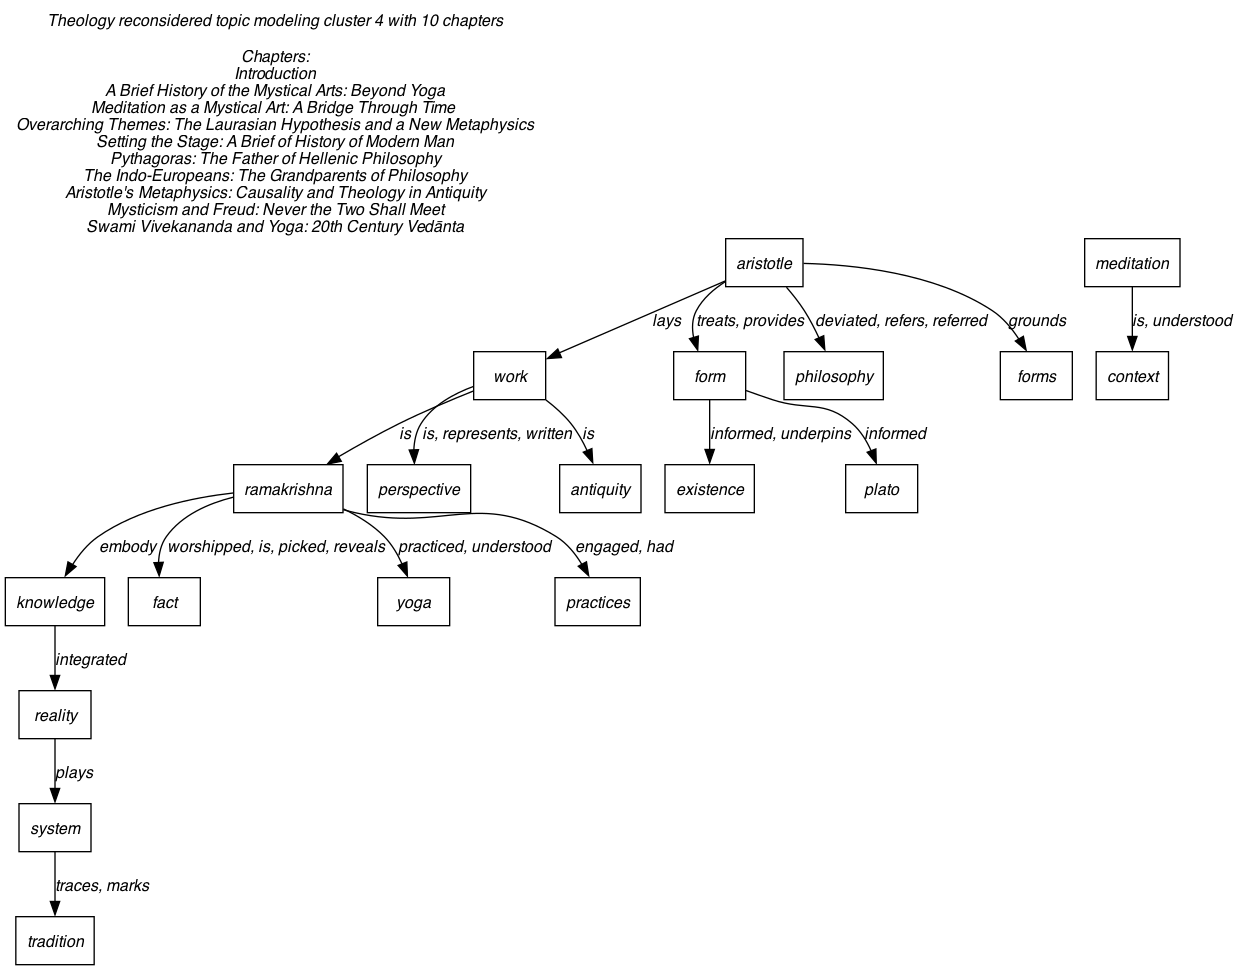

Removing the following terms:  ['quantum theory', 'quantum mechanics', 'classical mechanics', 'one', 'well', 'even', 'defined', 'underlying']


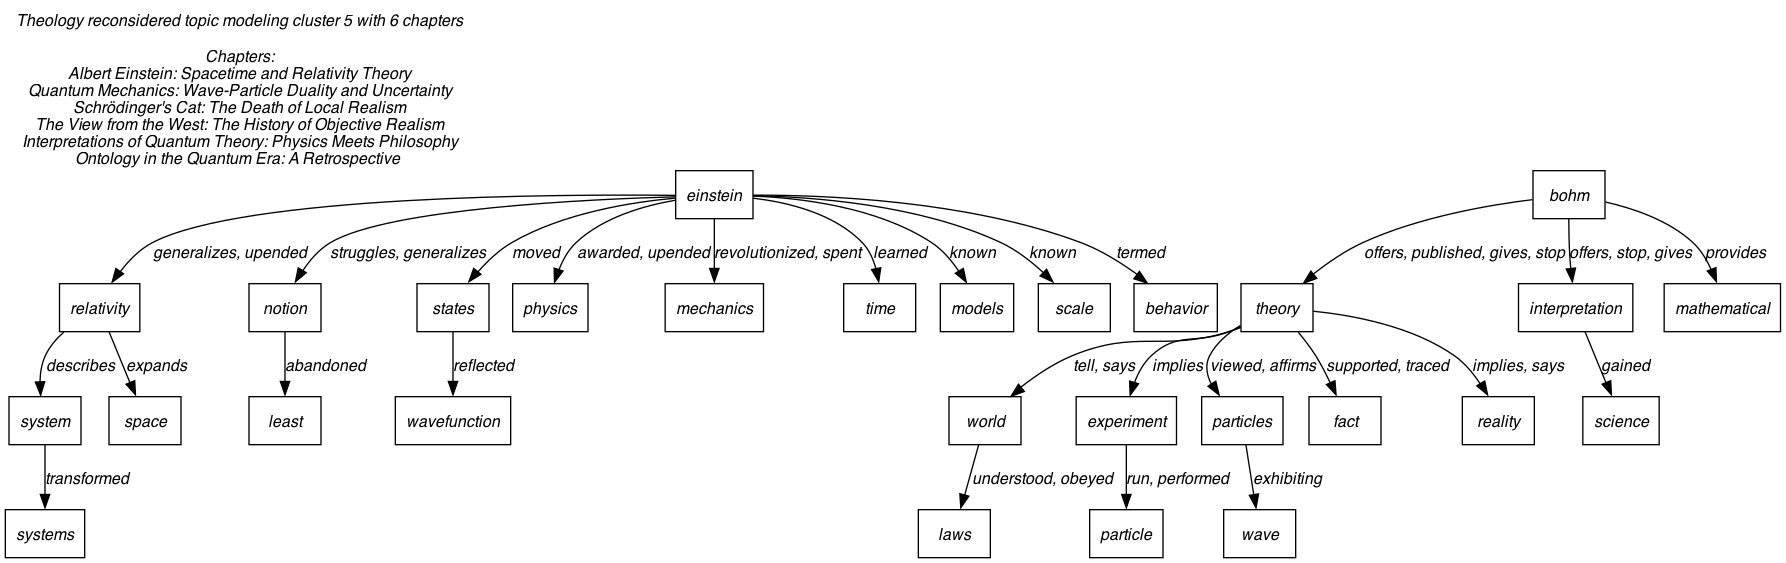

Removing the following terms:  ['one', 'well', 'also', 'metaphysics awareness']


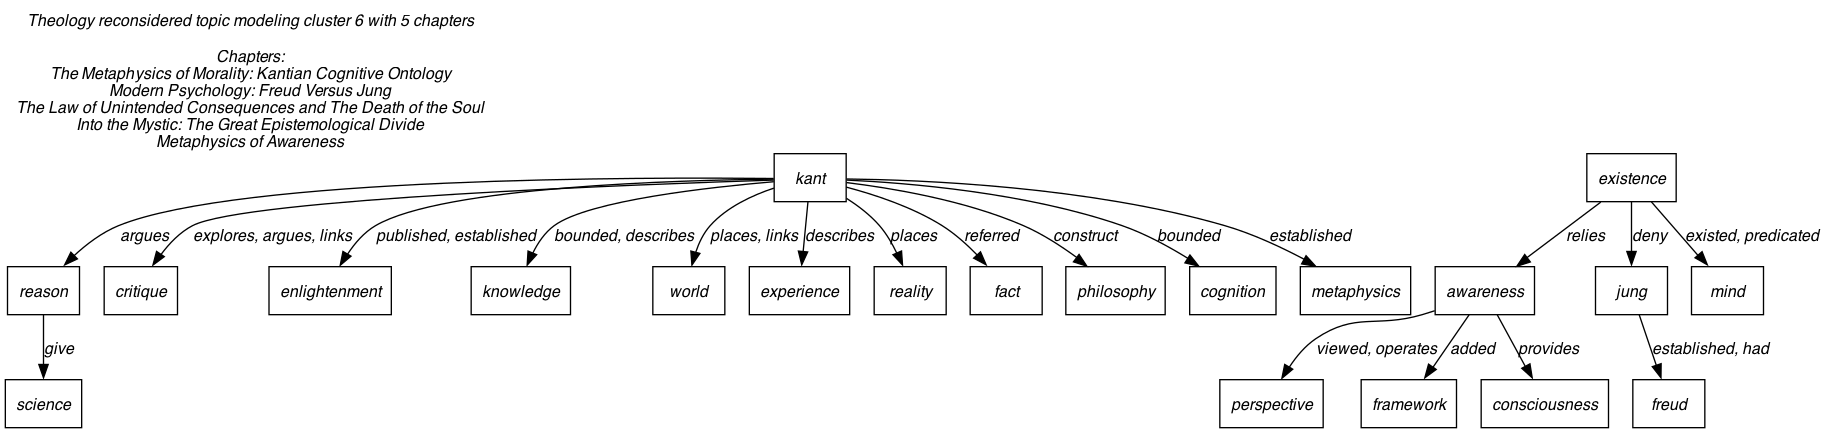

Removing the following terms:  ['one', 'ancient chinese', 'also', 'heaven earth', 'well', 'first', 'dàodé jīng', 'zhou dynasty', 'chinese antiquity', 'writing', 'see', 'form', 'chinese philosophical', 'two', 'even', 'written', 'eight']


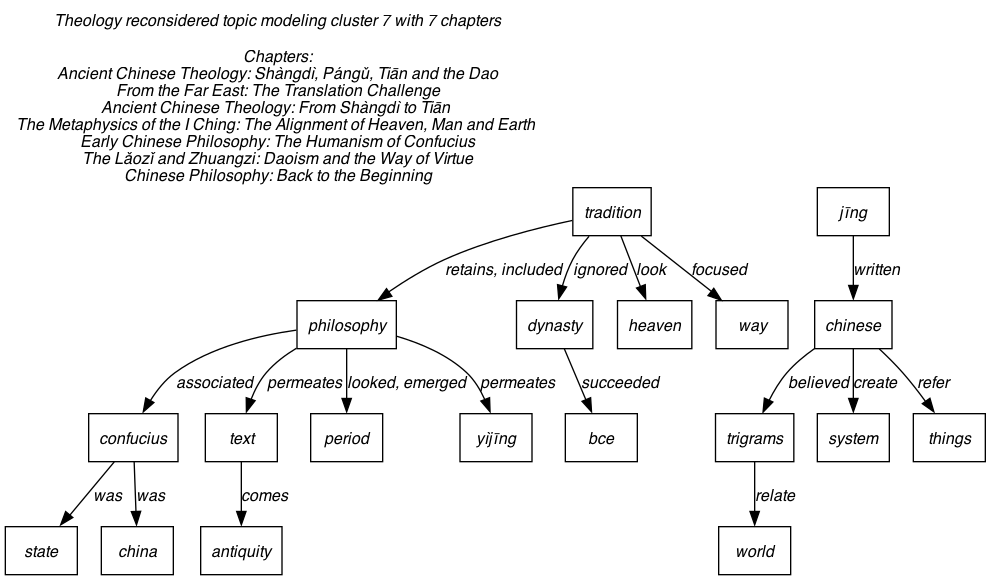

Removing the following terms:  ['al', 'one', 'also', 'well', 'first', 'works', 'muammad', 'salvation', 'old testament', 'qurn']


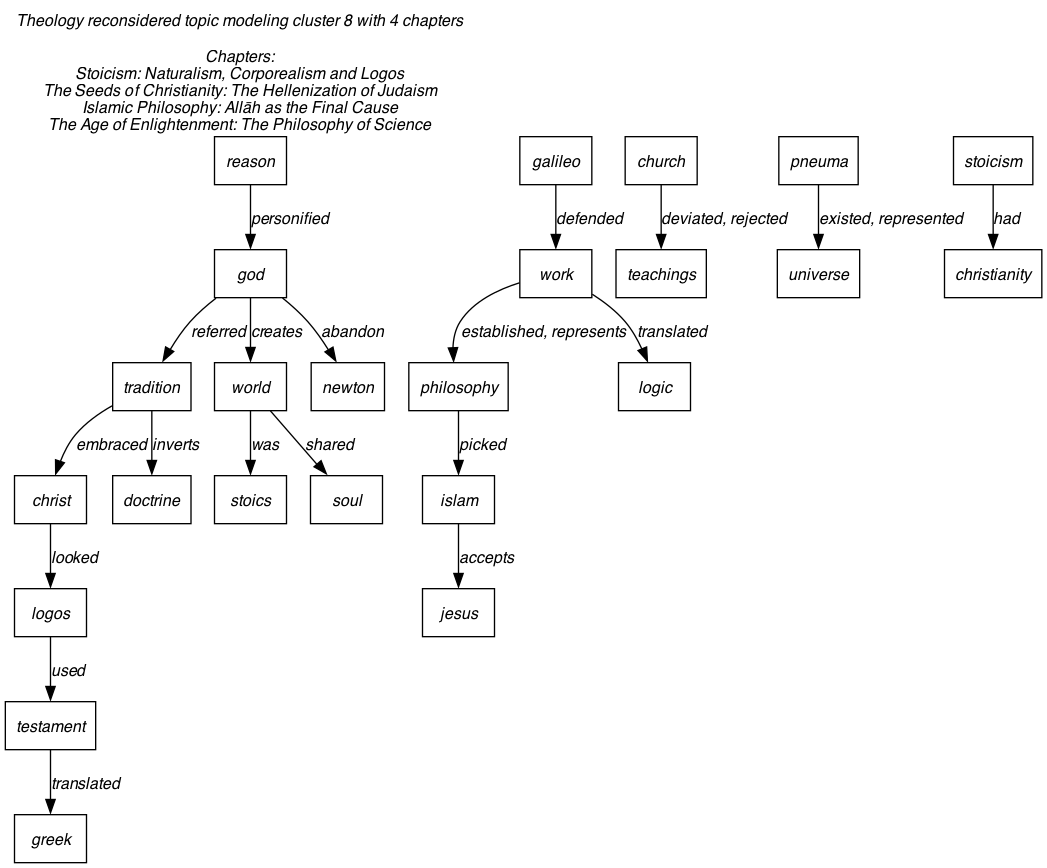

In [15]:
use_key_terms = True

# Specify the chapters used in the analysis.
for cluster in range(1, NUM_TOPICS+1):
    #print("Cluster: #", cluster)
    chosen_chapters = clusters[cluster]

    chapter_titles = [titles[i] for i in chosen_chapters]
    #print("Chosen chapters \n")
    # for title in chapter_titles:
    #     print(title)

    # Specify the number of top words to use.
    n = max(50, len(chosen_chapters)*5)

    text_per_chapter = []
    for chapter_idx in chosen_chapters:
        text_per_chapter.append(chapters[chapter_idx])

    tf_idf_pre_filtering = get_word_types_with_tf_idf(
        text_per_chapter,
        "tf",
        skip_stopwords=True,
        include_verbs=False,
        include_determiners=False,
        include_pronouns=False,
        include_adverbs=False,
        include_numbers=False,
    )

    if use_key_terms:
        current_level_words = current_level_words = filter_topic_modeling_key_terms(
            key_terms=key_terms_per_cluster[cluster],
            tf_idf_word_types=tf_idf_pre_filtering,
            verbose=True,
        )
    else:
        current_level_words = tf_idf_pre_filtering.head(n)["word"].values

    # Create a list of all verses of the chosen books.
    all_verses = []
    for chapter_idx in chosen_chapters:
        all_verses.extend(sentences_per_chapter[chapter_idx])
    directed_relations, relations_to_verbs = get_directed_relations(
        top_n_words=current_level_words,
        all_verses=all_verses,
        verbose=False,
    )
    ordered_directed_relations = order_directed_relations(
        directed_relations=directed_relations,
        tf_idf_pre_filtering=tf_idf_pre_filtering,
        order_by="product",
        include_ordering_wrt_occurences=True,
        verbose=False,
    )
    ontology_hierarchy, words_with_parents = construct_ontology_hierarchy(
        ordered_directed_relations=ordered_directed_relations,
    )
    # print_hierarchy_tree_from_ontology(
    #     ontological_hierarchy=ontology_hierarchy,
    #     words_with_parents=words_with_parents,
    # )
    draw_hierarchy_tree_from_ontology(
        ontological_hierarchy=ontology_hierarchy,
        relations_to_verbs=relations_to_verbs,
        title="Theology reconsidered topic modeling cluster " + str(cluster) + " with " + str(len(chosen_chapters)) + " chapters",
        topic_modelling_chapters=chapter_titles,
    )